In [2]:
# Only for debugging purpose
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook
import seaborn as sns
import os

#save_folder = 'results/No Weights_ricci_0'
#results_file = f"{save_folder}/scores.pkl"
#if os.path.exists(results_file):
#    r = pickle.load(open(results_file,'rb'))
#    print(r)

#save_folder = 'results/Evolved Weights_ricci_0'
#results_file = f"{save_folder}/scores.pkl"
#if os.path.exists(results_file):
#    r = pickle.load(open(results_file,'rb'))
#    print(r)

save_folder = "results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_0_Evolved Weights"
eval_inds_file = f"{save_folder}/failed.pkl"
if os.path.exists(eval_inds_file):
    r = pickle.load(open(eval_inds_file,'rb'))
    print(r)
    print(r['trace'])

{'taskid': 'ricci', 'exp_name': 'Evolved Weights', 'error': "name 'seed' is not defined", 'trace': 'Traceback (most recent call last):\n  File "/Users/sainia3/Desktop/genal/utils.py", line 558, in loop_with_equal_evals2\n    ga_func = partial(fitness_func, model = ml(random_state=super_seed), X=X_train, y=y_train, sens_features=sens_features, f_metric=subgroup_FNR_loss, seed=seed)\nNameError: name \'seed\' is not defined\n'}
Traceback (most recent call last):
  File "/Users/sainia3/Desktop/genal/utils.py", line 558, in loop_with_equal_evals2
    ga_func = partial(fitness_func, model = ml(random_state=super_seed), X=X_train, y=y_train, sens_features=sens_features, f_metric=subgroup_FNR_loss, seed=seed)
NameError: name 'seed' is not defined



In [11]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook
import seaborn as sns
import os

pd.set_option('display.max_rows', None)


# # Load the results
results_folder = '/Users/sainia3/Desktop/genal/results'
save_folder = 'figures/'

def load_scores_loop1(experiments, task_id_lists, base_save_folder, num_runs):
    results = []
    for taskid in task_id_lists:
        for run in range(num_runs):
            for exp in experiments:
                save_folder = f"{base_save_folder}/{exp}_{taskid}_{run}"
                print(save_folder)
                if not os.path.exists(save_folder):
                    r = {'exp_name': exp, 'taskid': taskid, 'run': run, 'remaining': True}
                    results.append(r)
                else:
                    # Load the results
                    results_file = f"{save_folder}/scores.pkl"
                    
                    if os.path.exists(results_file):
                        r = pickle.load(open(results_file,'rb'))
                        r['completed'] = True
                    else:
                        results_file = f"{save_folder}/failed.pkl"
                        if os.path.exists(results_file):
                            r = pickle.load(open(results_file,'rb'))
                            r['failed'] = True
                        else:
                             r = {'exp_name': exp, 'taskid': taskid, 'run': run, 'timeout': True}

                    results.append(r)


    df = pd.DataFrame.from_records(results)
    del results
    return df

def load_scores_loop2(experiments, task_id_lists, base_save_folder, num_evals):
    results = pd.DataFrame(columns = ['taskid','exp_name','seed','auroc', 'accuracy', 'balanced_accuracy', 'fairness', 'train_auroc', 'train_accuracy', 
                                                        'train_balanced_accuracy', 'train_fairness'])
    for taskid in task_id_lists:
        #for run in range(num_evals):
        for exp in experiments:
            save_folder = f"{base_save_folder}/{taskid}_{exp}"
            print(save_folder)
            if not os.path.exists(save_folder):
                #r = {'exp_name': exp, 'taskid': taskid, 'run': run, 'remaining': True}
                #results.append(r)
                continue
            else:
                # Load the results
                results_file = f"{save_folder}/scores.pkl"
                    
                if os.path.exists(results_file):
                    print("Yaas")
                    r = pickle.load(open(results_file,'rb'))
                    #print(r)
                    results = pd.concat([results,r], ignore_index=True)

    return results

def load_scores_loop3(experiments, task_id_lists, base_save_folder, num_replicates):
    results = pd.DataFrame(columns = ['replicate','taskid','exp_name','seed','auroc', 'accuracy', 'balanced_accuracy', 'fairness', 'train_auroc', 'train_accuracy', 
                                                        'train_balanced_accuracy', 'train_fairness'])
    for taskid in task_id_lists:
        for rep in range(num_replicates):
            for exp in experiments:
                save_folder = f"{base_save_folder}/{taskid}_{rep}_{exp}"
                print(save_folder)
                if not os.path.exists(save_folder):
                    #r = {'exp_name': exp, 'taskid': taskid, 'run': run, 'remaining': True}
                    #results.append(r)
                    continue
                else:
                    # Load the results
                    results_file = f"{save_folder}/scores.pkl"

                    if os.path.exists(results_file):
                        print("Yaas")
                        r = pickle.load(open(results_file,'rb'))
                        #print(r.head(3))
                        r['replicate'] = [rep]*r.shape[0]
                        #print(r.head(3))
                        results = pd.concat([results,r], ignore_index=True)

    return results

task_ids = ['ricci', 'heart_disease', 'student_math', 'student_por', 'creditg', 'titanic', 'us_crime', 'compas_violent', 'nlsy', 'compas']

experiments = ['No Weights',
               'Evolved Weights',
              'Calculated Weights']

results_folder = 'results3'
save_folder = 'figures/'

files_dir = [
    f for f in os.listdir(results_folder) if os.path.isdir(os.path.join(results_folder, f))
]
print(files_dir)

df0 = load_scores_loop3(experiments, task_ids[0:10], f'{results_folder}/{files_dir[0]}', 5)
#df1 =  load_scores_loop2(experiments, task_ids[0:10], f'{results_folder}/{files_dir[1]}', 30)
#df2 =  load_scores_loop2(experiments, task_ids[0:10], f'{results_folder}/{files_dir[2]}', 30)

["<class 'sklearn.ensemble._forest.RandomForestClassifier'>"]
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_0_No Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_0_Evolved Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_0_Calculated Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_1_No Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_1_Evolved Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_1_Calculated Weights
Yaas
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_2_No Weights
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_2_Evolved Weights
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_2_Calculated Weights
results3/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/ricci_3_No Weights
results3/

In [12]:
print(df0.head(10))

  replicate taskid    exp_name seed  auroc  accuracy  balanced_accuracy  \
0         0  ricci  No Weights    0    1.0  0.958333           0.954545   
1         0  ricci  No Weights    1    1.0  0.958333           0.954545   
2         0  ricci  No Weights    2    1.0  0.958333           0.954545   
3         0  ricci  No Weights    3    1.0  0.958333           0.954545   
4         0  ricci  No Weights    4    1.0  0.958333           0.954545   
5         0  ricci  No Weights    5    1.0  0.958333           0.954545   
6         0  ricci  No Weights    6    1.0  0.958333           0.954545   
7         0  ricci  No Weights    7    1.0  0.958333           0.954545   
8         0  ricci  No Weights    8    1.0  0.958333           0.954545   
9         0  ricci  No Weights    9    1.0  0.958333           0.954545   

   fairness  train_auroc  train_accuracy  train_balanced_accuracy  \
0  0.003977          1.0             1.0                      1.0   
1  0.004242          1.0            

In [ ]:
from deap.tools._hypervolume import pyhv

# Change both objectives such that 'less is better' AND both are normalized to [0,1]
# Use your pareto-front function assuming we want to minimize both objectives
PF = front(x_vals,y_vals)
pf_x = [x_vals[i] for i in PF]
pf_y = [y_vals[i] for i in PF]

# hv give a single value for a pareto front
hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))



/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the 

        auroc        dataset                 exp
0    1.000000          ricci          No Weights
1    1.000000          ricci          No Weights
2    1.000000          ricci          No Weights
3    1.000000          ricci          No Weights
4    1.000000          ricci          No Weights
5    1.000000          ricci          No Weights
6    1.000000          ricci          No Weights
7    1.000000          ricci          No Weights
8    1.000000          ricci          No Weights
9    1.000000          ricci          No Weights
10   1.000000          ricci          No Weights
11   1.000000          ricci          No Weights
12   1.000000          ricci          No Weights
13   1.000000          ricci          No Weights
14   1.000000          ricci          No Weights
15   1.000000          ricci          No Weights
16   1.000000          ricci          No Weights
17   1.000000          ricci          No Weights
18   1.000000          ricci          No Weights
19   1.000000       

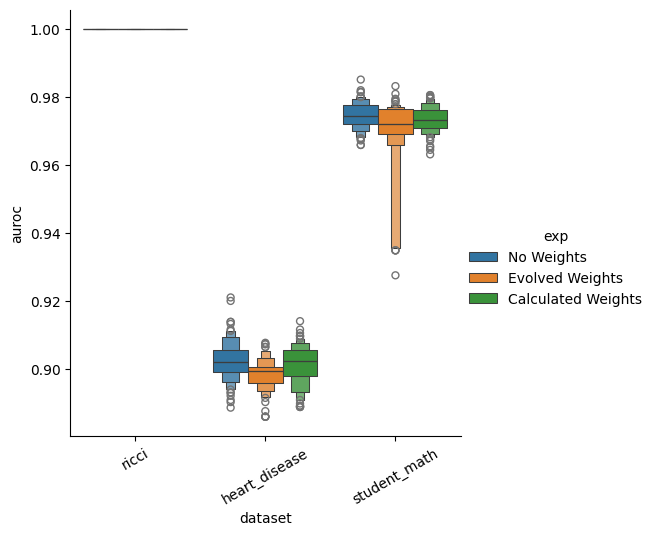

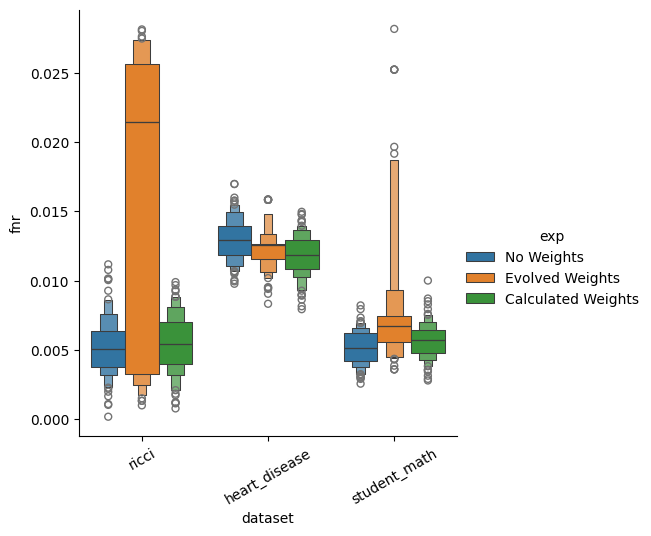

         hv        dataset                 exp
0  0.000000          ricci          No Weights
1  0.000000          ricci     Evolved Weights
2  0.000000          ricci  Calculated Weights
3  0.110350  heart_disease          No Weights
4  0.113141  heart_disease     Evolved Weights
5  0.110344  heart_disease  Calculated Weights
6  0.034053   student_math          No Weights
7  0.071625   student_math     Evolved Weights
8  0.036800   student_math  Calculated Weights


In [28]:
# Hypervolume of pareto front for different datasets
import numpy as np
import pandas as pd
from deap.tools._hypervolume import pyhv
import utils
# for dt in datasets:
#    for r in runs:
#       hv_base = pareto_front(base, dt, r)
#       hv_diff = pareto_front(diff, dt, r)
#    hv_base[dt] = avg(hv_base)
#    hv_diff[dt] = avg(hv_diff)


hv_df = pd.DataFrame(columns = ['hv', 'dataset', 'exp'])
perf_df = pd.DataFrame(columns = ['auroc', 'dataset', 'exp'])
fair_df = pd.DataFrame(columns = ['fnr', 'dataset', 'exp'])
#print(df)

def plot_results1(df):
    for taskid in task_ids:
        for exp in experiments:
    
            if not exp in df.values:
                continue
            
            if not taskid in df.values:
                continue
    
            x_vals = [] # auroc, etc
            y_vals = [] # fnr, etc.
    
            for run in range(20):
                this_df = df.loc[(df['exp_name'] == exp) & (df['taskid'] == taskid) & (df['run'] == run)]
                
                #print(this_df)
                
    
                perf_df.loc[len(perf_df.index)] = {'auroc' : this_df.iloc[0]['auroc'], 'dataset' : taskid, 'exp' : exp} 
                fair_df.loc[len(fair_df.index)] = {'fnr' : this_df.iloc[0]['fairness'], 'dataset' : taskid, 'exp' : exp}
                x_vals.append(this_df.iloc[0]['auroc'])
                y_vals.append(this_df.iloc[0]['fairness'])
    
            
            PF = utils.front(x_vals,y_vals)
            pf_x = [x_vals[i] for i in PF]
            pf_y = [y_vals[i] for i in PF]
            hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))
            hv_df.loc[len(hv_df.index)] = {'hv' : hv, 'dataset' : taskid, 'exp' : exp}
            
        
    print(perf_df)
    print(fair_df)
    g=sns.catplot(data=perf_df, x="dataset", y="auroc", hue="exp", kind="boxen")
    g.set_xticklabels(rotation=30)
    plt.savefig('figures/perf_rf.png', bbox_inches='tight')
    h=sns.catplot(data=fair_df, x="dataset", y="fnr", hue="exp", kind="boxen")
    h.set_xticklabels(rotation=30)
    plt.savefig('figures/fairness_rf.png', bbox_inches='tight')
    plt.show()
    
    print(hv_df)

def plot_results2(df):
    for taskid in task_ids:
        for exp in experiments:
    
            if not exp in df.values:
                continue
            
            if not taskid in df.values:
                continue
    
            x_vals = [] # auroc, etc
            y_vals = [] # fnr, etc.

            partial_df = df.loc[(df['exp_name'] == exp) & (df['taskid'] == taskid)]
    
            for index, row in partial_df.iterrows():
                #this_df = partial_df.loc[(df['run'] == run)]
                
                #print(this_df)
                perf_df.loc[len(perf_df.index)] = {'auroc' : row['auroc'], 'dataset' : taskid, 'exp' : exp} 
                fair_df.loc[len(fair_df.index)] = {'fnr' : row['fairness'], 'dataset' : taskid, 'exp' : exp}
                x_vals.append(row['auroc'])
                y_vals.append(row['fairness'])
    
            
            PF = utils.front(x_vals,y_vals)
            pf_x = [x_vals[i] for i in PF]
            pf_y = [y_vals[i] for i in PF]
            hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))
            hv_df.loc[len(hv_df.index)] = {'hv' : hv, 'dataset' : taskid, 'exp' : exp}
            
        
    print(perf_df)
    print(fair_df)
    g=sns.catplot(data=perf_df, x="dataset", y="auroc", hue="exp", kind="boxen")
    g.set_xticklabels(rotation=30)
    plt.savefig('figures/perf_rf.png', bbox_inches='tight')
    h=sns.catplot(data=fair_df, x="dataset", y="fnr", hue="exp", kind="boxen")
    h.set_xticklabels(rotation=30)
    plt.savefig('figures/fairness_rf.png', bbox_inches='tight')
    plt.show()
    
    print(hv_df)



plot_results2(df0)

NameError: name 'all_evals_df' is not defined

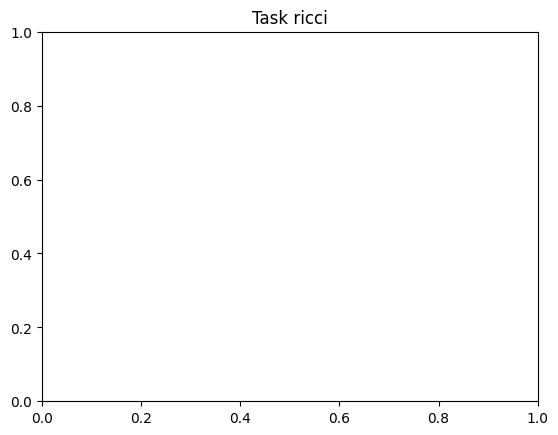

In [3]:
# primary objective vs generations
import matplotlib.pyplot as plt
import numpy as np


for taskid in task_ids:
    fig, ax = plt.subplots()
    ax.set_title(f"Task {taskid}")
    for exp in experiments:
        for run in range(5):
            if not run in all_evals_df[exp][taskid]:
                continue
            df = all_evals_df[exp][taskid][run]

            df = df[~df['roc_auc_score'].isin(["INVALID", "TIMEOUT"])]
            
            
            g = df['Generation'].to_numpy()
            #t  = df['time_since_start'].to_numpy()#/60/60
            s = df['roc_auc_score'].to_numpy()


            #sort by g

            g_argsort = np.argsort(g)
            g = g[g_argsort]
            s = s[g_argsort]

            #get cummulative best score
            s = np.minimum.accumulate(s)

            #ax.scatter(t, s, label=f"{exp}_{run}", alpha=0.2, color=colors[exp])
            ax.plot(g, s, label=f"{exp}_{run}", alpha=1, color=colors[exp])
            #




    ax.set_xlabel("Generation")
    ax.set_ylabel("AUROC")

    #log scale
    #ax.set_yscale('log')
    ax.legend()
        

/Users/sainia3/opt/anaconda3/envs/tpot2/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/Users/sainia3/opt/anaconda3/envs/tpot2/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolum

       auroc        dataset              exp
0   1.000000          ricci       No Weights
1   1.000000          ricci       No Weights
2   1.000000          ricci       No Weights
3   1.000000          ricci       No Weights
4   1.000000          ricci       No Weights
5   1.000000          ricci  Evolved Weights
6   1.000000          ricci  Evolved Weights
7   1.000000          ricci  Evolved Weights
8   1.000000          ricci  Evolved Weights
9   1.000000          ricci  Evolved Weights
10  0.905788  heart_disease       No Weights
11  0.896757  heart_disease       No Weights
12  0.900862  heart_disease       No Weights
13  0.906199  heart_disease       No Weights
14  0.908867  heart_disease       No Weights
15  0.898399  heart_disease  Evolved Weights
16  0.895936  heart_disease  Evolved Weights
17  0.909688  heart_disease  Evolved Weights
18  0.896962  heart_disease  Evolved Weights
19  0.892857  heart_disease  Evolved Weights
20  0.977874   student_math       No Weights
21  0.9699

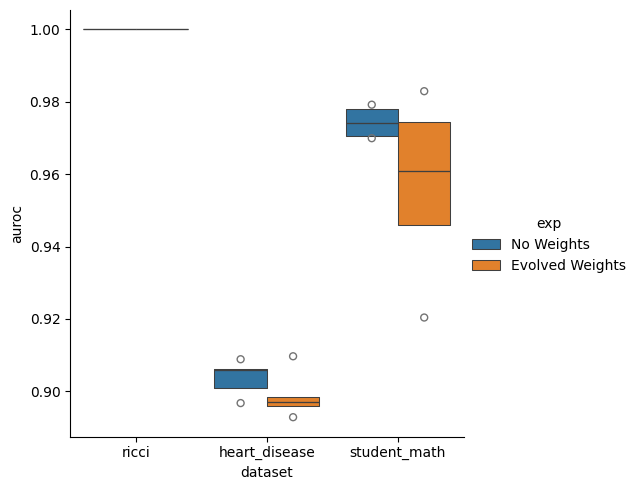

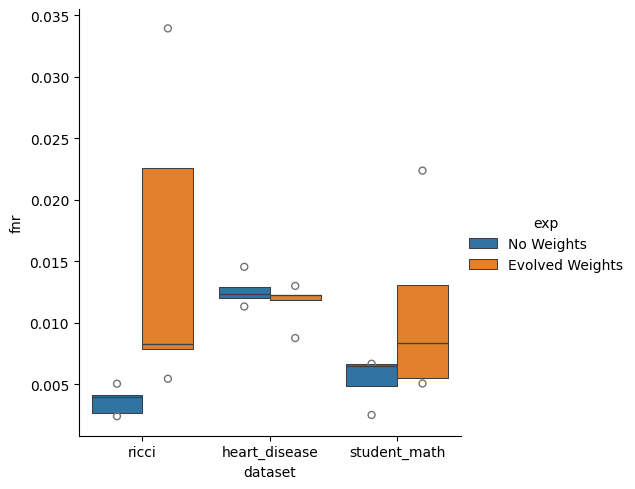

         hv        dataset              exp
0  0.000000          ricci       No Weights
1  0.000000          ricci  Evolved Weights
2  0.102067  heart_disease       No Weights
3  0.106204  heart_disease  Evolved Weights
4  0.029977   student_math       No Weights
5  0.078596   student_math  Evolved Weights


In [18]:
# Hypervolume of pareto front for different datasets
import numpy as np
import pandas as pd
from deap.tools._hypervolume import pyhv
import utils
# for dt in datasets:
#    for r in runs:
#       hv_base = pareto_front(base, dt, r)
#       hv_diff = pareto_front(diff, dt, r)
#    hv_base[dt] = avg(hv_base)
#    hv_diff[dt] = avg(hv_diff)


hv_df = pd.DataFrame(columns = ['hv', 'dataset', 'exp'])
perf_df = pd.DataFrame(columns = ['auroc', 'dataset', 'exp'])
fair_df = pd.DataFrame(columns = ['fnr', 'dataset', 'exp'])
#print(df)




for taskid in task_ids[0:3]:
    for exp in experiments:

        if not exp in df.values:
            continue
        
        if not taskid in df.values:
            continue

        x_vals = [] # auroc, etc
        y_vals = [] # fnr, etc.

        for run in range(5):
            #print(df.loc[df['exp_name'] == exp][df['taskid'] == taskid])
            #if not run in df.loc[df['exp_name'] == exp][df['taskid'] == taskid][:,'run']:
            #    continue
            this_df = df.loc[(df['exp_name'] == exp) & (df['taskid'] == taskid) & (df['run'] == run)]
            
            #print(this_df)
            

            perf_df.loc[len(perf_df.index)] = {'auroc' : this_df.iloc[0]['auroc'], 'dataset' : taskid, 'exp' : exp} 
            fair_df.loc[len(fair_df.index)] = {'fnr' : this_df.iloc[0]['fairness'], 'dataset' : taskid, 'exp' : exp}
            x_vals.append(this_df.iloc[0]['auroc'])
            y_vals.append(this_df.iloc[0]['fairness'])

        
        PF = utils.front(x_vals,y_vals)
        pf_x = [x_vals[i] for i in PF]
        pf_y = [y_vals[i] for i in PF]
        hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))
        hv_df.loc[len(hv_df.index)] = {'hv' : hv, 'dataset' : taskid, 'exp' : exp}
        
    
print(perf_df)
print(fair_df)
sns.catplot(data=perf_df, x="dataset", y="auroc", hue="exp", kind="boxen")
plt.savefig('Figures/perf.png', bbox_inches='tight')
sns.catplot(data=fair_df, x="dataset", y="fnr", hue="exp", kind="boxen")
plt.savefig('Figures/fairness.png', bbox_inches='tight')
plt.show()

print(hv_df)

In [16]:
#Check if one_hot_encoder works at all
from tpot2.builtin_modules.one_hot_encoder import OneHotEncoder
import pandas as pd

X_train = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
enc = OneHotEncoder()
enc.fit(X_train) 


InvalidIndexError: (slice(None, None, None), 0)

In [12]:
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook
import seaborn as sns
import os
import tpot2
import sklearn 
import utils
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import numpy as np
import sklearn

X_train, y_train, X_test, y_test, features, sens_features = utils.load_task('ricci')
all_pos_weights = [1]*len(X_train)
float_pos_weights = np.random.random_sample(size = len(X_train))
all_neg_weights = [-1]*len(X_train)
float_pos_neg_weights = 2*np.random.random_sample(size = len(X_train))-1

# What happens when sample weights are provided to a method that does not support them?
clf1 = MultinomialNB()
clf1.fit(X_train, y_train)
print(clf1.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf1, X_test, y_test))

clf2 = MultinomialNB()
clf2.fit(X_train, y_train, sample_weight=all_pos_weights)
print("all_pos_weights")
print(clf2.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf2, X_test, y_test))

clf22 = MultinomialNB()
clf22.fit(X_train, y_train, sample_weight=[0.5]*len(X_train))
print("all_05_pos_weights")
print(clf22.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf22, X_test, y_test))


clf3 = MultinomialNB()
clf3.fit(X_train, y_train, sample_weight=float_pos_weights)
print("float_pos_weights")
print(clf3.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf3, X_test, y_test))

clf5 = MultinomialNB()
clf5.fit(X_train, y_train, sample_weight=float_pos_neg_weights)
print("float_pos_neg_weights")
print(clf5.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf5, X_test, y_test))

clf4 = MultinomialNB()
clf4.fit(X_train, y_train, sample_weight=all_neg_weights)
print("all_neg_weights")
print(clf4.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf4, X_test, y_test))

clf5 = MultinomialNB()
clf5.fit(X_train, y_train, sample_weight=float_pos_neg_weights)
print("float_pos_neg_weights")
print(clf5.predict(X_test))
print(sklearn.metrics.get_scorer("roc_auc_ovr")(clf5, X_test, y_test))

data/ricci_True.pkl
[0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 1]
0.6693121693121693
all_pos_weights
[0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 1]
0.6693121693121693
all_05_pos_weights
[0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 1]
0.6746031746031746
float_pos_weights
[0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 1]
0.7116402116402116
float_pos_neg_weights
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/sainia3/opt/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/sklearn/naive_bayes.py:600: RuntimeWarning: invalid value encountered in log
  self.class_log_prior_ = log_class_count - np.log(self.class_count_.sum())


ValueError: Input contains NaN.